## Experimental Data

### Statistics Meets Experimental Science

- Conduct an experiment to gather data
    - Physical (e.g., in a biology lab)
    - Social (e.g., questionnaries)
    
- Use theory to generate some questions about data
    - Physical (e.g., gravitational fields)
    - Social (e.g., people give inconsistent answers)
    
- Design a computation to help answer questions about data

### This kind of Spring

Linear spring : amount of force needed to stretch or compress spring is linear in the distance the spring is stretched or compressed

Each spring has a spring constant, **k**, that determines how much force is needed

### Hooke's Law
![spring](image/spring.png)

$$ F = - k x$$
$$ k = -\frac{F}{x}$$
$$ k = \frac{9.86 * m}{x}$$

In [1]:
from lecture10_segment1 import *

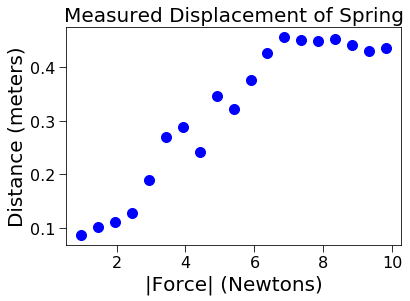

In [2]:
plotData('springData.txt')

### Fitting Curves to Data

- When we fit a curve to a set of data, we are finding a fit that relates an independent variable (the mass) to an estimated value of a dependent variable (the distance)

- In this case, we want to find a line such that some function of the sum of the distances from the line to the measured points is minimized

## Fitting a Model to Data

### Polynomials with One Variable (x)
- 0 or sum of finite number of non-zero terms

- Each term of the form $cx^p$
    - $c$, the coefficient, a real number
    - $p$, the degree of the term, a non-negative integer
    
- The degree of the polynomial is the largest degree of any term

- Examples
    - Line : $ax + b$
    - Parabola : $ax^2 + bx + c$

### Solving for Least Square

$$ \sum^{len(observed) - 1}_{i = 0} (observed[i] - predicted[i])^2 $$

- Use linear regression to find a degree-one polynomial, $ax + b$
- Find values of $a$ and $b$ such that when we use the polynomial to compute y values for all of the x values in our experiment, the squared difference of these values and the corresponding observed values is minimized

### polyFit
```python
pylab.polyfit(observedX, observedY, n)
```
- Finds coefficients of a polynomial of degree n, that provides a best least squares fit for the observed data

In [3]:
from lecture10_segment2 import *

a = 0.046432033192052496 b = 0.06562859649122803


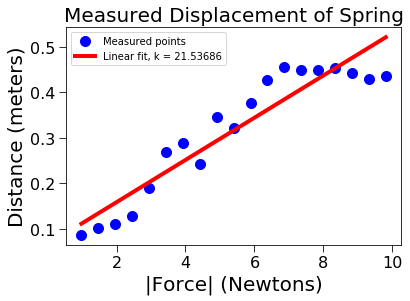

In [4]:
fitData('springData.txt')

### Version Using polyval

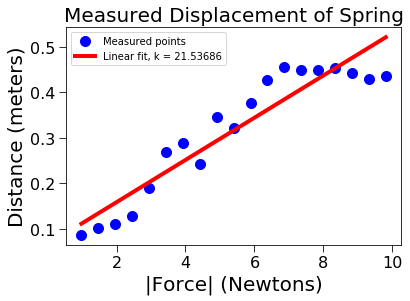

In [5]:
fitData1('springData.txt')

### Quadratic Appears to be a Better Fit

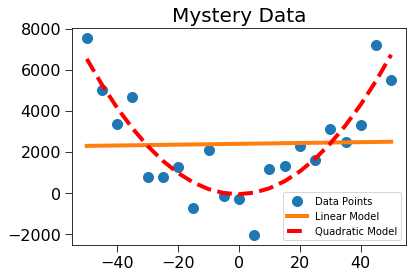

In [6]:
#parameters for generating data
xVals = range(-50, 51, 5)
a, b, c = 3.0, 0.0, 0.0
fracOutlier = 0.00

#generate data
random.seed(0)
yVals = genParabolicData(a, b, c, xVals, fracOutlier)
pylab.plot(xVals, yVals, 'o', label = 'Data Points')
pylab.title('Mystery Data')

#Try linear model
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Linear Model')

#Try a quadratic model
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Quadratic Model')
pylab.legend()

## Goodness of Fit

### Relative to Each Other
- Fit is a function from the independent variable to the dependent variable
- Given an independent value, provides an estimate of the dependent value
- Which fit provides better estimates

In [7]:
from lecture10_segment3 import *

In [8]:
#Compare models
def aveMeanSquareError(data, predicted):
   error = 0.0
   for i in range(len(data)):
       error += (data[i] - predicted[i])**2
   return error/len(data)

estYVals = pylab.polyval(model1, xVals)  
print('Ave. mean square error for linear model =',
     aveMeanSquareError(yVals, estYVals))
estYVals = pylab.polyval(model2, xVals)
print('Ave. mean square error for quadratic model =',
     aveMeanSquareError(yVals, estYVals))

Ave. mean square error for linear model = 6001055.190535765
Ave. mean square error for quadratic model = 1244098.3242314644


### In an Absolute Sense
- Mean square error useful for comparing two different models for the same data
- Useful for getting a sense of absolute goodness of fit?
- Hard to know, since there is no upper bound and not scale independent
- Instead, we use **coefficient of determination**, $R^2$,
$$ R^2 = 1 - \frac{\sum_i(y_i - p_i)^2}{\sum_i(y_i - \mu)^2} $$

### $R^2$ (R-squared)
- By comparing the estimation errors (the numerator) with the variability of the original values (the denominator), $R^2$ is intended to capture the proportion of variability in a dataset that is accounted for by the statistical model provided by the fit

- Always between 0 and 1 when fit generated by a linear regression and tested on training data

- If $R^2 = 1$, the model explains all of the variability in the data. If $R^2 = 0$, there is no relationship beteen the values predicted by the model and the actual data. If $R^2 = 0.5$, the model explains half the variability in the data.

### Testing Goodness of Fits

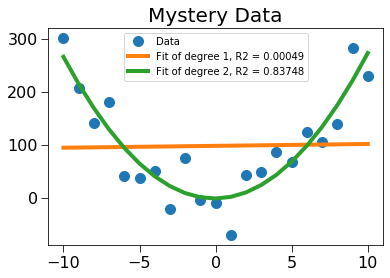

In [9]:
xVals, yVals = getData('mysteryData.txt')
degrees = (1, 2)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

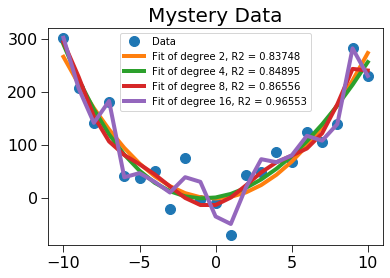

In [10]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [11]:
from lectureCode_L17_code import *

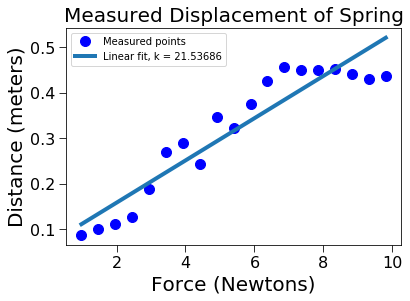

In [13]:
fitData('springData.txt')

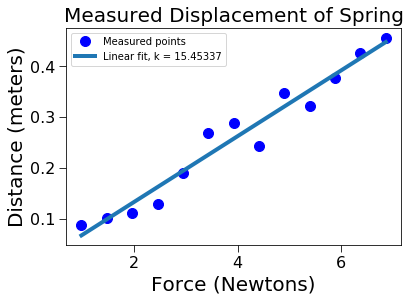

In [14]:
fitData3('springData.txt')